In [1]:
import xml.etree.ElementTree as et
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import StratifiedKFold
import seaborn as c
import matplotlib.pyplot as pl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
df=et.parse("C:\\Users\\91701\\Desktop\\physics.stackexchange.com\\Posts.xml")

In [3]:
root=df.getroot()

In [4]:
root

<Element 'posts' at 0x00000288BE749900>

In [5]:
root[0]

<Element 'row' at 0x00000288BE749B80>

In [6]:
s=[]
for i in root:
    s.append(i.attrib)
s

[{'Id': '1',
  'PostTypeId': '1',
  'AcceptedAnswerId': '5',
  'CreationDate': '2010-11-02T18:59:01.140',
  'Score': '76',
  'ViewCount': '13803',
  'Body': '<p>I often hear about subatomic particles having a property called "spin" but also that it doesn\'t actually relate to spinning about an axis like you would think. Which particles have spin? What does spin mean if not an actual spinning motion?</p>\n',
  'OwnerUserId': '7',
  'LastEditorUserId': '520',
  'LastEditDate': '2012-08-19T23:00:18.417',
  'LastActivityDate': '2018-04-29T07:55:39.087',
  'Title': 'What is spin as it relates to subatomic particles?',
  'Tags': '<quantum-mechanics><particle-physics><angular-momentum><quantum-spin>',
  'AnswerCount': '5',
  'CommentCount': '5',
  'FavoriteCount': '27'},
 {'Id': '2',
  'PostTypeId': '1',
  'AcceptedAnswerId': '5704',
  'CreationDate': '2010-11-02T19:09:48.680',
  'Score': '29',
  'ViewCount': '2641',
  'Body': "<p>How would you explain string theory to non physicists such as 

In [7]:
len(s)

345199

In [8]:
file=pd.DataFrame(s)

In [9]:
file.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'FavoriteCount', 'ParentId', 'OwnerDisplayName', 'ClosedDate',
       'LastEditorDisplayName', 'CommunityOwnedDate'],
      dtype='object')

In [10]:
file=file.drop(['LastEditorDisplayName',
            'ClosedDate',
            'OwnerDisplayName','LastEditorUserId',
           'AcceptedAnswerId','CommunityOwnedDate','ParentId','CommunityOwnedDate','OwnerUserId',
                'PostTypeId','LastActivityDate','LastEditDate','CreationDate'],axis=1)

In [11]:
file=file.dropna()

In [12]:
file.dtypes

Id               object
Score            object
ViewCount        object
Body             object
Title            object
Tags             object
AnswerCount      object
CommentCount     object
FavoriteCount    object
dtype: object

In [13]:
file['Id']=file['Id'].astype(int)

In [14]:
file['Score']=file['Score'].astype(int)

In [15]:
file['ViewCount']=file['ViewCount'].astype(int)

In [16]:
file['AnswerCount']=file['AnswerCount'].astype(int)

In [17]:
file['CommentCount']=file['CommentCount'].astype(int)

In [18]:
file['FavoriteCount']=file['FavoriteCount'].astype(int)

In [19]:
file.dtypes

Id                int32
Score             int32
ViewCount         int32
Body             object
Title            object
Tags             object
AnswerCount       int32
CommentCount      int32
FavoriteCount     int32
dtype: object

In [20]:
quality=file.loc[:,['AnswerCount','Score']]

In [21]:
quality['Quality'] = np.where(quality['Score'] > 5,
    np.where(quality['AnswerCount'] > 0, 'Good', 'Low'),
    np.where(quality['Score'] < 0, 'Very Low', 'Low'))

In [22]:
quality

,AnswerCount,Score,Quality
0,5,76,Good
1,4,29,Good
2,3,35,Good
5,6,10,Good
7,6,48,Good
...,...,...,...
345086,0,1,Low
345090,0,0,Low
345097,2,0,Low
345117,4,14,Good


In [23]:
q=quality['Quality']

In [24]:
file

,Id,Score,ViewCount,Body,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,1,76,13803,<p>I often hear about subatomic particles havi...,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...,5,5,27
1,2,29,2641,<p>How would you explain string theory to non ...,What is your simplest explanation of the strin...,<string-theory><education>,4,4,8
2,3,35,2412,<p>This is a question that has been posted at ...,"Lie theory, Representations and particle physics",<particle-physics><group-theory><representatio...,3,5,13
5,7,10,2033,<p>What are the main problems that we need to ...,Will Determinism be ever possible?,<quantum-mechanics><quantum-interpretations><h...,6,5,5
7,9,48,9277,<p>Hamilton's principle states that a dynamic ...,Hamilton's Principle,<lagrangian-formalism><variational-principle><...,6,2,32
...,...,...,...,...,...,...,...,...,...
345086,483671,1,24,<p>If lagrangian is dependent only on <span cl...,Lagrangian for inertial frame,<special-relativity><classical-mechanics><refe...,0,2,1
345090,483675,0,22,<p>Let there be a ring of mass m and radius r....,A basic question on rotation,<homework-and-exercises><rotational-dynamics><...,0,0,1
345097,483682,0,60,<p>Just watched a video explaining how oil fil...,EM waves cancelling each other - do they inter...,<quantum-mechanics><electromagnetic-radiation>...,2,2,1
345117,483702,14,318,<p>I have been taught that the boundary condit...,Why does the Schrödinger equation work so well...,<quantum-mechanics><schroedinger-equation><coo...,4,6,4


In [25]:
file=file.drop(['AnswerCount','Score'],axis=1)

In [26]:
file=pd.concat([file,q],axis=1)

In [27]:
file

,Id,ViewCount,Body,Title,Tags,CommentCount,FavoriteCount,Quality
0,1,13803,<p>I often hear about subatomic particles havi...,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...,5,27,Good
1,2,2641,<p>How would you explain string theory to non ...,What is your simplest explanation of the strin...,<string-theory><education>,4,8,Good
2,3,2412,<p>This is a question that has been posted at ...,"Lie theory, Representations and particle physics",<particle-physics><group-theory><representatio...,5,13,Good
5,7,2033,<p>What are the main problems that we need to ...,Will Determinism be ever possible?,<quantum-mechanics><quantum-interpretations><h...,5,5,Good
7,9,9277,<p>Hamilton's principle states that a dynamic ...,Hamilton's Principle,<lagrangian-formalism><variational-principle><...,2,32,Good
...,...,...,...,...,...,...,...,...
345086,483671,24,<p>If lagrangian is dependent only on <span cl...,Lagrangian for inertial frame,<special-relativity><classical-mechanics><refe...,2,1,Low
345090,483675,22,<p>Let there be a ring of mass m and radius r....,A basic question on rotation,<homework-and-exercises><rotational-dynamics><...,0,1,Low
345097,483682,60,<p>Just watched a video explaining how oil fil...,EM waves cancelling each other - do they inter...,<quantum-mechanics><electromagnetic-radiation>...,2,1,Low
345117,483702,318,<p>I have been taught that the boundary condit...,Why does the Schrödinger equation work so well...,<quantum-mechanics><schroedinger-equation><coo...,6,4,Good


In [28]:
file.iloc[25,3]

'Mnemonics to remember various properties of materials'

In [29]:
from bs4 import BeautifulSoup
html_generator = (html_string for html_string in list(file['Body']))
# Split the HTML strings into batches of size 1000
batch_size = 1000
html_batches = [list(file['Body'])[i:i+batch_size] for i in range(0, len(list(file['Body'])), batch_size)]
# Process each batch of HTML strings
text_list = []
for html_batch in html_batches:
    batch_text_list = []
    for html_string in html_batch:
        soup = BeautifulSoup(html_string, "html.parser")
        text = soup.get_text()
        batch_text_list.append(text)
    text_list.extend(batch_text_list)


In [30]:
file['Body']=text_list

In [31]:
file

,Id,ViewCount,Body,Title,Tags,CommentCount,FavoriteCount,Quality
0,1,13803,I often hear about subatomic particles having ...,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...,5,27,Good
1,2,2641,How would you explain string theory to non phy...,What is your simplest explanation of the strin...,<string-theory><education>,4,8,Good
2,3,2412,This is a question that has been posted at man...,"Lie theory, Representations and particle physics",<particle-physics><group-theory><representatio...,5,13,Good
5,7,2033,What are the main problems that we need to sol...,Will Determinism be ever possible?,<quantum-mechanics><quantum-interpretations><h...,5,5,Good
7,9,9277,Hamilton's principle states that a dynamic sys...,Hamilton's Principle,<lagrangian-formalism><variational-principle><...,2,32,Good
...,...,...,...,...,...,...,...,...
345086,483671,24,"If lagrangian is dependent only on $v^2$, then...",Lagrangian for inertial frame,<special-relativity><classical-mechanics><refe...,2,1,Low
345090,483675,22,Let there be a ring of mass m and radius r. Le...,A basic question on rotation,<homework-and-exercises><rotational-dynamics><...,0,1,Low
345097,483682,60,Just watched a video explaining how oil film c...,EM waves cancelling each other - do they inter...,<quantum-mechanics><electromagnetic-radiation>...,2,1,Low
345117,483702,318,I have been taught that the boundary condition...,Why does the Schrödinger equation work so well...,<quantum-mechanics><schroedinger-equation><coo...,6,4,Good


In [32]:
new=file.iloc[:,[2,3,4]]

In [33]:
new

,Body,Title,Tags
0,I often hear about subatomic particles having ...,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...
1,How would you explain string theory to non phy...,What is your simplest explanation of the strin...,<string-theory><education>
2,This is a question that has been posted at man...,"Lie theory, Representations and particle physics",<particle-physics><group-theory><representatio...
5,What are the main problems that we need to sol...,Will Determinism be ever possible?,<quantum-mechanics><quantum-interpretations><h...
7,Hamilton's principle states that a dynamic sys...,Hamilton's Principle,<lagrangian-formalism><variational-principle><...
...,...,...,...
345086,"If lagrangian is dependent only on $v^2$, then...",Lagrangian for inertial frame,<special-relativity><classical-mechanics><refe...
345090,Let there be a ring of mass m and radius r. Le...,A basic question on rotation,<homework-and-exercises><rotational-dynamics><...
345097,Just watched a video explaining how oil film c...,EM waves cancelling each other - do they inter...,<quantum-mechanics><electromagnetic-radiation>...
345117,I have been taught that the boundary condition...,Why does the Schrödinger equation work so well...,<quantum-mechanics><schroedinger-equation><coo...


In [34]:
body=[]
title=[]
tags=[]
for i in range(new.shape[0]):
    body.append(len(new.iloc[i,0]))
    title.append(len(new.iloc[i,1]))
    tags.append(len(new.iloc[i,2]))

In [35]:
new['Body_length']=body
new['Title_length']=title
new['Tags_length']=tags
new

,Body,Title,Tags,Body_length,Title_length,Tags_length
0,I often hear about subatomic particles having ...,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...,241,50,69
1,How would you explain string theory to non phy...,What is your simplest explanation of the strin...,<string-theory><education>,163,55,26
2,This is a question that has been posted at man...,"Lie theory, Representations and particle physics",<particle-physics><group-theory><representatio...,777,48,55
5,What are the main problems that we need to sol...,Will Determinism be ever possible?,<quantum-mechanics><quantum-interpretations><h...,128,34,91
7,Hamilton's principle states that a dynamic sys...,Hamilton's Principle,<lagrangian-formalism><variational-principle><...,242,20,53
...,...,...,...,...,...,...
345086,"If lagrangian is dependent only on $v^2$, then...",Lagrangian for inertial frame,<special-relativity><classical-mechanics><refe...,117,29,76
345090,Let there be a ring of mass m and radius r. Le...,A basic question on rotation,<homework-and-exercises><rotational-dynamics><...,351,28,97
345097,Just watched a video explaining how oil film c...,EM waves cancelling each other - do they inter...,<quantum-mechanics><electromagnetic-radiation>...,544,83,60
345117,I have been taught that the boundary condition...,Why does the Schrödinger equation work so well...,<quantum-mechanics><schroedinger-equation><coo...,732,118,98


In [36]:
file=file.drop(["Body","Title","Tags"],axis=1)

In [37]:
file=pd.concat([file,new.iloc[:,4:7]],axis=1)

In [38]:
file=pd.concat([file,new['Body_length']],axis=1)

In [39]:
file

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
0,1,13803,5,27,Good,50,69,241
1,2,2641,4,8,Good,55,26,163
2,3,2412,5,13,Good,48,55,777
5,7,2033,5,5,Good,34,91,128
7,9,9277,2,32,Good,20,53,242
...,...,...,...,...,...,...,...,...
345086,483671,24,2,1,Low,29,76,117
345090,483675,22,0,1,Low,28,97,351
345097,483682,60,2,1,Low,83,60,544
345117,483702,318,6,4,Good,118,98,732


In [40]:
file=file.replace({"Good":2,"Low":1,"Very Low":0})

In [41]:
file['Quality'].value_counts()

1    42774
2    13722
0     1780
Name: Quality, dtype: int64

In [42]:
file

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
0,1,13803,5,27,2,50,69,241
1,2,2641,4,8,2,55,26,163
2,3,2412,5,13,2,48,55,777
5,7,2033,5,5,2,34,91,128
7,9,9277,2,32,2,20,53,242
...,...,...,...,...,...,...,...,...
345086,483671,24,2,1,1,29,76,117
345090,483675,22,0,1,1,28,97,351
345097,483682,60,2,1,1,83,60,544
345117,483702,318,6,4,2,118,98,732


In [43]:
file.columns

Index(['Id', 'ViewCount', 'CommentCount', 'FavoriteCount', 'Quality',
       'Title_length', 'Tags_length', 'Body_length'],
      dtype='object')

In [44]:
x=file.loc[:,['Id', 'ViewCount', 'CommentCount', 'FavoriteCount', 'Title_length', 'Tags_length', 'Body_length']]
y=file.loc[:,['Quality']]

In [45]:
x

,Id,ViewCount,CommentCount,FavoriteCount,Title_length,Tags_length,Body_length
0,1,13803,5,27,50,69,241
1,2,2641,4,8,55,26,163
2,3,2412,5,13,48,55,777
5,7,2033,5,5,34,91,128
7,9,9277,2,32,20,53,242
...,...,...,...,...,...,...,...
345086,483671,24,2,1,29,76,117
345090,483675,22,0,1,28,97,351
345097,483682,60,2,1,83,60,544
345117,483702,318,6,4,118,98,732


In [46]:
y

,Quality
0,2
1,2
2,2
5,2
7,2
...,...
345086,1
345090,1
345097,1
345117,2


In [47]:
file

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
0,1,13803,5,27,2,50,69,241
1,2,2641,4,8,2,55,26,163
2,3,2412,5,13,2,48,55,777
5,7,2033,5,5,2,34,91,128
7,9,9277,2,32,2,20,53,242
...,...,...,...,...,...,...,...,...
345086,483671,24,2,1,1,29,76,117
345090,483675,22,0,1,1,28,97,351
345097,483682,60,2,1,1,83,60,544
345117,483702,318,6,4,2,118,98,732


In [48]:
file.ViewCount.describe()

count     58276.000000
mean       2272.624305
std        9401.022208
min           5.000000
25%         145.000000
50%         413.000000
75%        1329.000000
max      785052.000000
Name: ViewCount, dtype: float64

In [49]:
file.CommentCount.describe()

count    58276.000000
mean         2.696376
std          3.189003
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         67.000000
Name: CommentCount, dtype: float64

In [50]:
file.FavoriteCount.describe()

count    58276.000000
mean         2.413738
std          5.486853
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        502.000000
Name: FavoriteCount, dtype: float64

In [51]:
file.Title_length.describe()

count    58276.000000
mean        57.488246
std         24.022357
min         15.000000
25%         40.000000
50%         54.000000
75%         71.000000
max        150.000000
Name: Title_length, dtype: float64

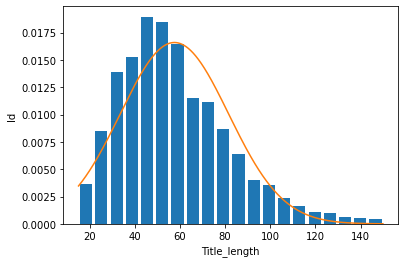

In [52]:
from scipy.stats import norm
pl.hist(file.Title_length, bins=20, rwidth=0.8, density=True)
pl.xlabel('Title_length')
pl.ylabel('Id')
rng = np.arange(file.Title_length.min(), file.Title_length.max(), 0.1)
pl.plot(rng, norm.pdf(rng,file.Title_length.mean(),file.Title_length.std()))

In [53]:
u=file.Title_length.mean()+(3*file.Title_length.std())
l=file.Title_length.mean()-(3*file.Title_length.std())

In [54]:
file[(file.Title_length>u)|(file.Title_length<l)]

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
865,944,4060,1,5,2,147,47,455
1258,1368,8172,2,13,2,132,97,580
2128,2328,7745,8,3,2,147,60,570
2834,3107,550,0,3,2,133,22,120
3749,4156,3229,2,14,2,134,79,1030
...,...,...,...,...,...,...,...,...
341941,480091,33,10,1,1,133,66,571
343341,481762,25,4,1,1,141,14,605
344342,482864,11,1,1,1,135,24,136
344538,483075,30,2,1,1,135,23,266


In [55]:
file.shape

(58276, 8)

In [56]:
639/58276

0.010965062804585078

In [57]:
file=file[(file.Title_length<u)&(file.Title_length>l)]

In [58]:
file

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
0,1,13803,5,27,2,50,69,241
1,2,2641,4,8,2,55,26,163
2,3,2412,5,13,2,48,55,777
5,7,2033,5,5,2,34,91,128
7,9,9277,2,32,2,20,53,242
...,...,...,...,...,...,...,...,...
345086,483671,24,2,1,1,29,76,117
345090,483675,22,0,1,1,28,97,351
345097,483682,60,2,1,1,83,60,544
345117,483702,318,6,4,2,118,98,732


In [59]:
file.Tags_length.describe()

count    57637.000000
mean        53.216823
std         23.106047
min          5.000000
25%         36.000000
50%         53.000000
75%         71.000000
max        129.000000
Name: Tags_length, dtype: float64

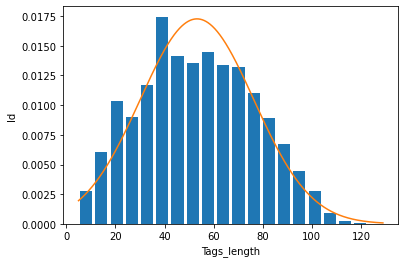

In [60]:
from scipy.stats import norm
pl.hist(file.Tags_length, bins=20, rwidth=0.8, density=True)
pl.xlabel('Tags_length')
pl.ylabel('Id')
rng = np.arange(file.Tags_length.min(), file.Tags_length.max(), 0.1)
pl.plot(rng, norm.pdf(rng,file.Tags_length.mean(),file.Tags_length.std()))

In [61]:
u=file.Tags_length.mean()+(3*file.Tags_length.std())
l=file.Tags_length.mean()-(3*file.Tags_length.std())

In [62]:
file[(file.Tags_length>u)|(file.Tags_length<l)]

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
86838,113241,1065,1,8,2,35,129,3912


In [63]:
1/57637

1.7349966167565972e-05

In [64]:
file=file[(file.Tags_length<u)&(file.Tags_length>l)]

In [65]:
file

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
0,1,13803,5,27,2,50,69,241
1,2,2641,4,8,2,55,26,163
2,3,2412,5,13,2,48,55,777
5,7,2033,5,5,2,34,91,128
7,9,9277,2,32,2,20,53,242
...,...,...,...,...,...,...,...,...
345086,483671,24,2,1,1,29,76,117
345090,483675,22,0,1,1,28,97,351
345097,483682,60,2,1,1,83,60,544
345117,483702,318,6,4,2,118,98,732


In [66]:
file.Body_length.describe()

count    57636.000000
mean       891.986224
std        838.760020
min         32.000000
25%        375.000000
50%        657.000000
75%       1133.000000
max      22793.000000
Name: Body_length, dtype: float64

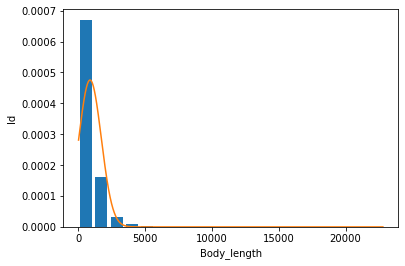

In [67]:
pl.hist(file.Body_length, bins=20, rwidth=0.8, density=True)
pl.xlabel('Body_length')
pl.ylabel('Id')
rng = np.arange(file.Body_length.min(), file.Body_length.max(), 0.1)
pl.plot(rng, norm.pdf(rng,file.Body_length.mean(),file.Body_length.std()))

In [68]:
u=file.Body_length.mean()+(3*file.Body_length.std())
l=file.Body_length.mean()-(3*file.Body_length.std())

In [69]:
file[(file.Body_length>u)|(file.Body_length<l)]

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
1414,1544,1075,24,8,2,32,75,4485
1808,1975,2084,7,11,2,64,36,3825
2518,2757,1216,15,1,1,36,29,4129
2617,2865,4863,64,26,2,53,60,19938
3377,3718,3137,3,4,1,81,22,4428
...,...,...,...,...,...,...,...,...
341936,480086,35,5,1,1,85,104,8651
343442,481880,46,2,1,1,98,95,6023
343881,482367,143,0,1,1,41,49,7722
344328,482848,40,3,2,1,87,100,4169


In [70]:
967/54679

0.01768503447392966

In [71]:
file=file[(file.Body_length<u)&(file.Body_length>l)]

In [72]:
file

,Id,ViewCount,CommentCount,FavoriteCount,Quality,Title_length,Tags_length,Body_length
0,1,13803,5,27,2,50,69,241
1,2,2641,4,8,2,55,26,163
2,3,2412,5,13,2,48,55,777
5,7,2033,5,5,2,34,91,128
7,9,9277,2,32,2,20,53,242
...,...,...,...,...,...,...,...,...
345086,483671,24,2,1,1,29,76,117
345090,483675,22,0,1,1,28,97,351
345097,483682,60,2,1,1,83,60,544
345117,483702,318,6,4,2,118,98,732


In [73]:
file=file.drop(['Id'],axis=1)

In [74]:
file.isnull().value_counts()

ViewCount  CommentCount  FavoriteCount  Quality  Title_length  Tags_length  Body_length
False      False         False          False    False         False        False          56669
dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [76]:
file.columns

Index(['ViewCount', 'CommentCount', 'FavoriteCount', 'Quality', 'Title_length',
       'Tags_length', 'Body_length'],
      dtype='object')

In [77]:
x=file.loc[:,['ViewCount', 'CommentCount', 'FavoriteCount', 'Title_length',
       'Tags_length', 'Body_length']]
y=file.loc[:,['Quality']]

In [78]:
x

,ViewCount,CommentCount,FavoriteCount,Title_length,Tags_length,Body_length
0,13803,5,27,50,69,241
1,2641,4,8,55,26,163
2,2412,5,13,48,55,777
5,2033,5,5,34,91,128
7,9277,2,32,20,53,242
...,...,...,...,...,...,...
345086,24,2,1,29,76,117
345090,22,0,1,28,97,351
345097,60,2,1,83,60,544
345117,318,6,4,118,98,732


In [79]:
y

,Quality
0,2
1,2
2,2
5,2
7,2
...,...
345086,1
345090,1
345097,1
345117,2


In [80]:
y.value_counts()

Quality
1          41647
2          13285
0           1737
dtype: int64

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model1=LogisticRegression()

In [82]:
model1.fit(x_train, y_train)

LogisticRegression()

In [83]:
y_pred1=model1.predict(x_test)
sf=StratifiedKFold(n_splits=10)

In [84]:
cross_val_score(model1,x_test,y_test,cv=sf,scoring='accuracy').mean()

0.8073641802399971

In [85]:
accuracy_score(y_test,y_pred1)

0.8077760131756956

In [86]:
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()
model2.fit(x_train, y_train)
cross_val_score(model2,x_test,y_test,cv=sf,scoring='accuracy').mean()

0.688430680914341

In [87]:
accuracy_score(y_test,model2.predict(x_test))

0.6616669607670137

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
f=[]
for i in range(3,15):   
    model3=RandomForestClassifier(max_depth=i,random_state=1)
    model3.fit(x_train,y_train)
    f.append(cross_val_score(model3,x_test,y_test,cv=sf,scoring='accuracy').mean())
print(max(f))

0.8304804786111977


In [90]:
f

[0.8234221738077949,
 0.8269513435003631,
 0.8292453574022203,
 0.8294806169381334,
 0.8304804786111977,
 0.8298925199709514,
 0.8300689213957189,
 0.8301866030362763,
 0.8291276411799288,
 0.8283631082062455,
 0.8277748729121278,
 0.8274218971539232]

In [91]:
model3=RandomForestClassifier(max_depth=7,random_state=1)
model3.fit(x_train,y_train)
cross_val_score(model3,x_test,y_test,cv=sf,scoring='accuracy').mean()

0.8304804786111977

In [92]:
accuracy_score(y_test,model3.predict(x_test))

0.8314216810775836

In [93]:
from xgboost import XGBClassifier
model4=XGBClassifier(random_state=1,max_depth=i)
model4.fit(x_train,y_train)
cross_val_score(model4,x_test,y_test,cv=sf,scoring='accuracy').mean()

0.8224223812981982

In [94]:
accuracy_score(y_test,model4.predict(x_test))

0.8264807952473384